In [0]:
import tensorflow as tf
print(tf.__version__)


2.1.0


In [0]:
!pip uninstall tensorflow
!pip install tensorflow==2.1.0

Uninstalling tensorflow-1.15.0:
  Would remove:
    /tensorflow-1.15.0/python3.6/tensorflow-1.15.0.dist-info/*
    /tensorflow-1.15.0/python3.6/tensorflow/*
    /tensorflow-1.15.0/python3.6/tensorflow_core/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-1.15.0
     |████████████████████████████████| 3.9MB 45.1MB/s 
     |████████████████████████████████| 450kB 45.0MB/s 
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow-addons~=0.7.0, but you'll have tensorflow-addons 0.8.3 which is incompatible.
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1


In [0]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
import pandas as pd
import numpy as np
import os

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

from nltk.corpus import stopwords
from nltk.util import ngrams

from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import classification_report,confusion_matrix

from collections import defaultdict
from collections import Counter
plt.style.use('ggplot')
stop=set(stopwords.words('english'))

import re
from nltk.tokenize import word_tokenize
import gensim
import string

from tqdm import tqdm
# from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
# from keras.models import Sequential
# from keras.layers import Embedding, LSTM,Dense, SpatialDropout1D, Dropout
# from keras.initializers import Constant
# from keras.optimizers import Adam

### SetUp drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
!pwd

/content


In [0]:
path='/content/drive/My Drive/CLOUD/nlp-getting-started'
%cd $path
%ls

/content/drive/My Drive/CLOUD/nlp-getting-started
glove-global-vectors-for-word-representation/
model_dropout-0.2-e3-bs4.h5
model.h5
__pycache__/
sample_submission.csv
socialmedia-disaster-tweets-DFE.csv
test.csv
tokenization.py
train.csv


## Data Cleaning

In [0]:
import re

In [0]:
example="New competition launched :https://www.kaggle.com/c/nlp-getting-started"
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

remove_URL(example)

# # Thanks to https://www.kaggle.com/rftexas/text-only-kfold-bert
# def clean_tweets(tweet):
#     """Removes links and non-ASCII characters"""
    
#     tweet = ''.join([x for x in tweet if x in string.printable])
    
#     # Removing URLs
#     tweet = re.sub(r"http\S+", "", tweet)
    
#     return tweet

'New competition launched :'

In [0]:
example = """<div>
<h1>Real or Fake</h1>
<p>Kaggle </p>
<a href="https://www.kaggle.com/c/nlp-getting-started">getting started</a>
</div>"""

def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)
print(remove_html(example))


Real or Fake
Kaggle 
getting started



In [0]:
# Reference : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

remove_emoji("Omg another Earthquake 😔😔")

# # Thanks to https://www.kaggle.com/rftexas/text-only-kfold-bert
# def remove_emoji(text):
#     emoji_pattern = re.compile("["
#                            u"\U0001F600-\U0001F64F"  # emoticons
#                            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
#                            u"\U0001F680-\U0001F6FF"  # transport & map symbols
#                            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
#                            u"\U00002702-\U000027B0"
#                            u"\U000024C2-\U0001F251"
#                            "]+", flags=re.UNICODE)
#     return emoji_pattern.sub(r'', text)

'Omg another Earthquake '

In [0]:
import string
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

example="I ;am @a #king!...."
print(remove_punct(example))


# # Thanks to https://www.kaggle.com/rftexas/text-only-kfold-bert
# def remove_punctuations(text):
#     punctuations = '@#!?+&*[]-%.:/();$=><|{}^' + "'`"
    
#     for p in punctuations:
#         text = text.replace(p, f' {p} ')

#     text = text.replace('...', ' ... ')
    
#     if '...' not in text:
#         text = text.replace('..', ' ... ')
    
#     return text

I am a king


In [0]:
# Thanks to https://www.kaggle.com/rftexas/text-only-kfold-bert
abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", #"que pasa",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

In [0]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# Thanks to https://www.kaggle.com/rftexas/text-only-kfold-bert
def convert_abbrev(word):
    return abbreviations[word.lower()] if word.lower() in abbreviations.keys() else word

def convert_abbrev_in_text(text):
    tokens = word_tokenize(text)
    tokens = [convert_abbrev(word) for word in tokens]
    text = ' '.join(tokens)
    return text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## BERT

In [0]:
# Thanks to very good kernel https://www.kaggle.com/xhlulu/disaster-nlp-keras-bert-using-tfhub
# We will use the official tokenization script created by the Google team
# Already installed in drive 'nlp-getting-started' folder
# !wget --quiet https://raw.githubusercontent.com/tensorflow/models/master/official/nlp/bert/tokenization.py

In [0]:
# import tensorflow as tf
!pip install sentencepiece

from tensorflow.keras.layers import Dense, Input, Dropout, Conv1D, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow_hub as hub

import tokenization

In [0]:
import numpy as np
def bert_encode(texts, tokenizer, max_len=512):
    all_tokens = []
    all_masks = []
    all_segments = []
    
    for text in texts:
        text = tokenizer.tokenize(text)
            
        text = text[:max_len-2]
        input_sequence = ["[CLS]"] + text + ["[SEP]"]
        pad_len = max_len - len(input_sequence)
        
        tokens = tokenizer.convert_tokens_to_ids(input_sequence)
        tokens += [0] * pad_len
        pad_masks = [1] * len(input_sequence) + [0] * pad_len
        segment_ids = [0] * max_len
        
        all_tokens.append(tokens)
        all_masks.append(pad_masks)
        all_segments.append(segment_ids)
    
    return np.array(all_tokens), np.array(all_masks), np.array(all_segments)

In [0]:
def build_model(bert_layer, max_len=512):
    input_word_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    input_mask = Input(shape=(max_len,), dtype=tf.int32, name="input_mask")
    segment_ids = Input(shape=(max_len,), dtype=tf.int32, name="segment_ids")

    pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])
    clf_output = sequence_output[:, 0, :]

    # clf_output=Conv1D(256, 5 , activation='relu')(sequence_output)
    # clf_output=GlobalAveragePooling1D()(clf_output)
    
    # clf_output=tf.keras.layers.GRU(1024,return_sequences=False)(sequence_output)
#     clf_output=Dense(64,activation='tanh')(clf_output)
    
#     clf_output=tf.keras.layers.Conv1D(1024, 8,activation='relu')(sequence_output)
#     clf_output=tf.keras.layers.GlobalAveragePooling1D()(clf_output)
    # out = Dense(1, activation='sigmoid')(clf_output)
    x = Dropout(Dropout_num)(clf_output)
    out = Dense(1, activation='sigmoid')(x)

    # if Dropout_num == 0:
    #     # Without Dropout
    #     out = Dense(1, activation='sigmoid')(clf_output)
    # else:
    #     # With Dropout(Dropout_num), Dropout_num > 0
    #     x = Dropout(Dropout_num)(clf_output)
    #     out = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=out)
    model.compile(Adam(lr=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

### Load and Preprocess


*   Load BERT from the Tensorflow Hub
*   Load CSV files containing training data
* Load tokenizer from the bert layer
* Encode the text into tokens, masks, and segment flags



In [0]:
# Load BERT from the Tensorflow Hub
%%time
module_url = "https://tfhub.dev/tensorflow/bert_en_cased_L-24_H-1024_A-16/1"
bert_layer = hub.KerasLayer(module_url, trainable=True)

CPU times: user 20 s, sys: 4.93 s, total: 24.9 s
Wall time: 28.9 s


In [0]:
%ls

glove-global-vectors-for-word-representation/
model_conv1d_dropout-0.2-e4-bs4.h5
model_dropout-0.2-e3-bs4.h5
model.h5
__pycache__/
sample_submission.csv
socialmedia-disaster-tweets-DFE.csv
test.csv
tokenization.py
train.csv


In [0]:
# Load CSV files containing training data
import pandas as pd
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [0]:
gt_df = pd.read_csv("https://raw.githubusercontent.com/kb10241024/Real-or-not/master/socialmedia-disaster-tweets-DFE.csv")

In [0]:
gt_df = gt_df[['choose_one','keyword','location', 'text']]
gt_df['target'] = (gt_df['choose_one']=='Relevant').astype(int)
gt_df['id'] = gt_df.index
gt_df

,choose_one,keyword,location,text,target,id
0,Relevant,NaN,NaN,Just happened a terrible car crash,1,0
1,Relevant,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,1
2,Relevant,NaN,NaN,"Heard about #earthquake is different cities, s...",1,2
3,Relevant,NaN,NaN,"there is a forest fire at spot pond, geese are...",1,3
4,Relevant,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,4
...,...,...,...,...,...,...
10871,Relevant,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,10871
10872,Relevant,NaN,NaN,Police investigating after an e-bike collided ...,1,10872
10873,Relevant,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1,10873
10874,Relevant,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,1,10874


In [0]:
train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


#### Target Correction
Run Data Cleaning sections first

In [0]:
target_corrected=True
target_big_corrected=True

In [0]:
# Thanks to https://www.kaggle.com/wrrosa/keras-bert-using-tfhub-modified-train-data - 
# author of this kernel read tweets in training data and figure out that some of them have errors:
if target_corrected:
    ids_with_target_error = [328,443,513,2619,3640,3900,4342,5781,6552,6554,6570,6701,6702,6729,6861,7226]
    train.loc[train['id'].isin(ids_with_target_error),'target'] = 0
    train[train['id'].isin(ids_with_target_error)]

In [0]:
# Thanks to https://www.kaggle.com/rftexas/text-only-kfold-bert
if target_big_corrected:
    gt_df['text'] = gt_df['text'].apply(lambda x: remove_URL(x))
    train["text"] = train["text"].apply(lambda x: remove_URL(x))
    test["text"] = test["text"].apply(lambda x: remove_URL(x))

    gt_df['text'] = gt_df['text'].apply(lambda x: remove_html(x))
    train["text"] = train["text"].apply(lambda x: remove_html(x))
    test["text"] = test["text"].apply(lambda x: remove_html(x))

    gt_df['text'] = gt_df['text'].apply(lambda x: remove_emoji(x))
    train["text"] = train["text"].apply(lambda x: remove_emoji(x))
    test["text"] = test["text"].apply(lambda x: remove_emoji(x))
    
    gt_df['text'] = gt_df['text'].apply(lambda x: remove_punct(x))
    train["text"] = train["text"].apply(lambda x: remove_punct(x))
    test["text"] = test["text"].apply(lambda x: remove_punct(x))
    
    gt_df['text'] = gt_df['text'].apply(lambda x: convert_abbrev_in_text(x))
    train["text"] = train["text"].apply(lambda x: convert_abbrev_in_text(x))
    test["text"] = test["text"].apply(lambda x: convert_abbrev_in_text(x))

#### Build and train BERT model

In [0]:
# Thanks to https://www.kaggle.com/xhlulu/disaster-nlp-keras-bert-using-tfhub
# Load tokenizer from the bert layer
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = tokenization.FullTokenizer(vocab_file, do_lower_case)

In [0]:
# Thanks to https://www.kaggle.com/xhlulu/disaster-nlp-keras-bert-using-tfhub
# Encode the text into tokens, masks, and segment flags
gt_df_input = bert_encode(gt_df.text.values, tokenizer, max_len=160)
test_input = bert_encode(test.text.values, tokenizer, max_len=160)
train_labels = train.target.values

In [0]:
gt_df_labels = gt_df.target.values

In [0]:
Dropout_num = 0.2
learning_rate = 5e-6
valid = 0.3
epochs_num = 3
batch_size_num = 8
# target_corrected = False
# target_big_corrected = False

In [0]:
# Thanks to https://www.kaggle.com/xhlulu/disaster-nlp-keras-bert-using-tfhub
# Build BERT model with my tuning
model_BERT = build_model(bert_layer, max_len=160)
model_BERT.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 160)]        0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, 160)]        0                                            
__________________________________________________________________________________________________
segment_ids (InputLayer)        [(None, 160)]        0                                            
__________________________________________________________________________________________________
keras_layer_1 (KerasLayer)      [(None, 1024), (None 333579265   input_word_ids[0][0]             
                                                                 input_mask[0][0]           

In [0]:
# Train BERT model with my tuning
checkpoint = ModelCheckpoint('model_BERT_cased_d0.2_e4_b4.h5', monitor='val_loss', save_best_only=True)

train_history = model_BERT.fit(
    gt_df_input, gt_df_labels,
    validation_split = valid,
    epochs = 3, # recomended 3-5 epochs
    callbacks=[checkpoint],
    batch_size = batch_size_num,
    # verbose=2
)

Train on 7613 samples, validate on 3263 samples
Epoch 1/3
7608/7613 [============================>.] - ETA: 0s - loss: 0.4722 - accuracy: 0.7830

In [0]:
model_BERT.save('model_conv1d_dropout-0.2-e4-bs4.h5')

In [0]:
%ls

glove-global-vectors-for-word-representation/
model_conv1d_dropout-0.2-e4-bs4.h5
model_dropout-0.2-e3-bs4.h5
model.h5
__pycache__/
sample_submission.csv
socialmedia-disaster-tweets-DFE.csv
test.csv
tokenization.py
train.csv


## Showing Confusion Matrices

In [0]:
# Thanks to https://www.kaggle.com/marcovasquez/basic-nlp-with-tensorflow-and-wordcloud

# Showing Confusion Matrix
def plot_cm(y_true, y_pred, title, figsize=(5,4)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    plt.title(title)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)

In [0]:
# Prediction by BERT model with my tuning for the training data - for the Confusion Matrix
train_pred_BERT = model_BERT.predict(gt_df_input)
train_pred_BERT_int = train_pred_BERT.round().astype('int')

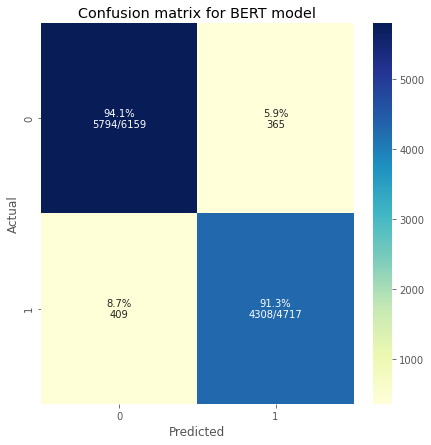

In [0]:
# Showing Confusion Matrix for BERT model
plot_cm(train_pred_BERT_int, gt_df['target'].values, 'Confusion matrix for BERT model', figsize=(7,7))

In [0]:
# Prediction by BERT model with my tuning
# model_BERT.load_weights('model_BERT.h5')
test_pred_BERT = model_BERT.predict(test_input)
test_pred_BERT_int = test_pred_BERT.round().astype('int')

In [0]:
submission = pd.read_csv("sample_submission.csv")

In [0]:
submission['target'] = test_pred_BERT_int
submission.head(10)